In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  Ocean Niño Index 

## Descargar los datos de internet

Página web: http://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php

Datos: https://www.esrl.noaa.gov/psd/data/correlation/oni.data

### Uso de pandas para descargar los datos de Internet

In [2]:
oni = pd.read_csv("https://www.esrl.noaa.gov/psd/data/correlation/oni.data", skiprows=1, 
                  skipfooter=8, header=None, delim_whitespace=True, engine="python")
#oni.to_csv("./data/oni.txt", index=False)
oni.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1950,-1.53,-1.34,-1.16,-1.18,-1.07,-0.85,-0.54,-0.42,-0.39,-0.44,-0.60,-0.80
1,1951,-0.82,-0.54,-0.17,0.18,0.36,0.58,0.70,0.89,0.99,1.15,1.04,0.81
2,1952,0.53,0.37,0.34,0.29,0.20,0.00,-0.08,0.00,0.15,0.10,0.04,0.15
3,1953,0.40,0.60,0.63,0.66,0.75,0.77,0.75,0.73,0.78,0.84,0.84,0.81
4,1954,0.76,0.47,-0.05,-0.41,-0.54,-0.50,-0.64,-0.84,-0.90,-0.77,-0.73,-0.66


In case you do not have an internet connection the ONI data set is stored in the folder `./data/oni.txt`

In [3]:
oni_raw = pd.read_csv("./data/oni.txt")
oni_raw.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
64,2014,-0.37,-0.36,-0.17,0.13,0.30,0.23,0.07,0.03,0.18,0.44,0.59,0.66
65,2015,0.60,0.56,0.62,0.79,1.02,1.25,1.54,1.83,2.11,2.37,2.53,2.64
66,2016,2.53,2.23,1.68,1.03,0.48,-0.00,-0.34,-0.57,-0.68,-0.74,-0.71,-0.56
67,2017,-0.29,-0.06,0.15,0.29,0.39,0.38,0.16,-0.14,-0.44,-0.70,-0.88,-0.97
68,2018,-0.86,-0.75,-0.60,-0.41,-0.14,-99.90,-99.90,-99.90,-99.90,-99.90,-99.90,-99.90


## Limpieza de datos

In [4]:
oni_raw = oni_raw.replace(-99.90, np.nan)
oni_raw.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
64,2014,-0.37,-0.36,-0.17,0.13,0.30,0.23,0.07,0.03,0.18,0.44,0.59,0.66
65,2015,0.60,0.56,0.62,0.79,1.02,1.25,1.54,1.83,2.11,2.37,2.53,2.64
66,2016,2.53,2.23,1.68,1.03,0.48,-0.00,-0.34,-0.57,-0.68,-0.74,-0.71,-0.56
67,2017,-0.29,-0.06,0.15,0.29,0.39,0.38,0.16,-0.14,-0.44,-0.70,-0.88,-0.97
68,2018,-0.86,-0.75,-0.60,-0.41,-0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Formato ancho a largo

In [5]:
oni_melted = pd.melt(oni_raw, id_vars="0", value_name="ONI", var_name="Month")
oni_melted.tail()

,0,Month,ONI
823,2014,12,0.66
824,2015,12,2.64
825,2016,12,-0.56
826,2017,12,-0.97
827,2018,12,NaN


## Añadir columna de fecha

In [6]:
oni_melted["Date"] = oni_melted.apply(lambda x: pd.to_datetime(str(x[0]) +"-"+ str(x["Month"])).to_period("M"), axis=1)
oni_melted.head()

,0,Month,ONI,Date
0,1950,1,-1.53,1950-01
1,1951,1,-0.82,1951-01
2,1952,1,0.53,1952-01
3,1953,1,0.40,1953-01
4,1954,1,0.76,1954-01


## Subconjunto del conjunto de datos

In [7]:
oni = oni_melted[["Date", "ONI"]].sort_values("Date").set_index("Date")
oni.head()

,ONI
Date,
1950-01,-1.53
1950-02,-1.34
1950-03,-1.16
1950-04,-1.18
1950-05,-1.07


In [8]:
oni = oni["2005":"2015"]
oni

,ONI
Date,
2005-01,0.64
2005-02,0.58
2005-03,0.45
2005-04,0.43
2005-05,0.29
2005-06,0.11
2005-07,-0.06
2005-08,-0.14
2005-09,-0.11


## Trazar los datos

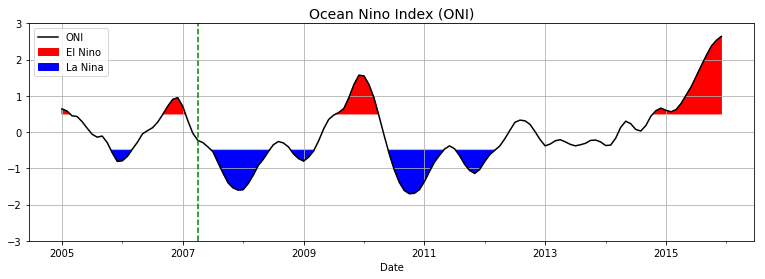

In [9]:
fig, ax = plt.subplots(figsize=(13,4))
oni.plot(ax=ax, color="k")
ax.fill_between(oni.index, 0.5, oni.ONI, where=oni.ONI >= 0.5, color="red", label="El Nino", interpolate=True)
ax.fill_between(oni.index, -0.5, oni.ONI, where=oni.ONI <= -0.5, color="blue", label="La Nina", interpolate=True)
ax.grid()
ax.legend()
ax.set_ylim(-3,3)
ax.set_title("Ocean Nino Index (ONI)", size=14)
ax.axvline("2007-4", color="green", linestyle="dashed");

## Refactorización del código

In [10]:
# %load src/oni_plot.py
def plot_oni(df, min_max = None, vline=None, ax=None):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(13,4))
    
    oni_melted = pd.melt(df, id_vars="0", value_name="ONI", var_name="Month")
    oni_melted["Date"] = oni_melted.apply(lambda x: pd.to_datetime(str(x[0]) +"-"+ str(x["Month"])).to_period("M"), axis=1)
    oni = oni_melted[["Date", "ONI"]].sort_values("Date").reset_index(drop=True).set_index("Date")
    if min_max is not None:
        oni = oni[str(min_max[0]):str(min_max[1])]        

    oni.plot(ax=ax, color="k")
    ax.fill_between(oni.index, 0.5, oni.ONI, where=oni.ONI >= 0.5,color="red", label="El Nino", interpolate=True)
    ax.fill_between(oni.index, -0.5, oni.ONI, where=oni.ONI <= -0.5,color="blue", label="La Nina", interpolate=True)
    ax.grid()
    ax.legend()
    ax.set_ylim(-3,3)
    ax.set_title("Ocean Nino Index (ONI)", size=14)
    
    if vline is not None:
        ax.axvline(str(vline), color="green", linestyle="dashed");
        

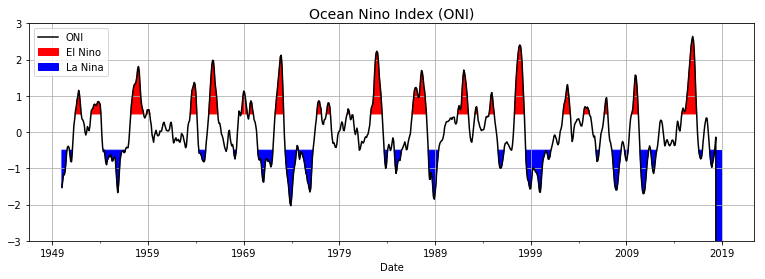

In [11]:
oni = pd.read_csv("./data/oni.txt")
plot_oni(oni)

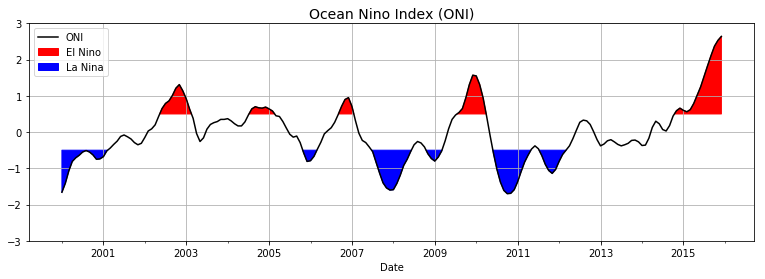

In [12]:
plot_oni(oni, min_max = [2000, 2015])

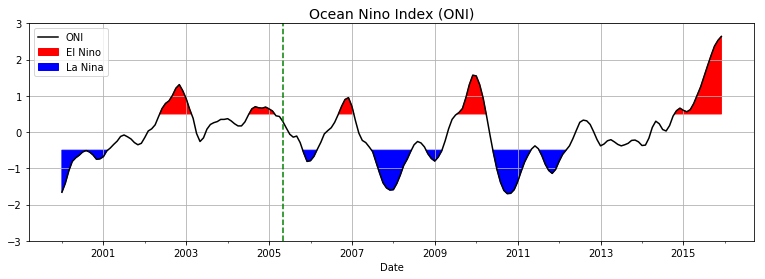

In [13]:
plot_oni(oni, min_max = [2000, 2015], vline="2005-5")